# Generative Models in Deep Learning

**Department of Computer Science**  
**DS5118-Deep Learning, Fall 2025**

**Instructor: Dr. Jameel Ahmed --- Done By: M. Umer**

**January 6, 2026**

---

This notebook covers fundamental generative models in deep learning:

- **Autoencoders (AE)** - Learning compressed representations
- **Variational Autoencoders (VAE)** - Probabilistic generative models
- **Generative Adversarial Networks (GAN)** - Adversarial training for generation


In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, Model
from tensorflow.keras.datasets import mnist, fashion_mnist
import warnings

warnings.filterwarnings("ignore")

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

print(f"TensorFlow version: {tf.__version__}")

TensorFlow version: 2.19.0


---

## Part 1: Data Preparation

We'll use the MNIST dataset for our experiments with generative models.


In [2]:
# Load and preprocess MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize to [0, 1] range
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

# Reshape for neural networks
X_train_flat = X_train.reshape(-1, 784)
X_test_flat = X_test.reshape(-1, 784)

# For CNN-based models
X_train_cnn = X_train.reshape(-1, 28, 28, 1)
X_test_cnn = X_test.reshape(-1, 28, 28, 1)

print(f"Training samples: {len(X_train)}")
print(f"Test samples: {len(X_test)}")
print(f"Image shape: {X_train[0].shape}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training samples: 60000
Test samples: 10000
Image shape: (28, 28)


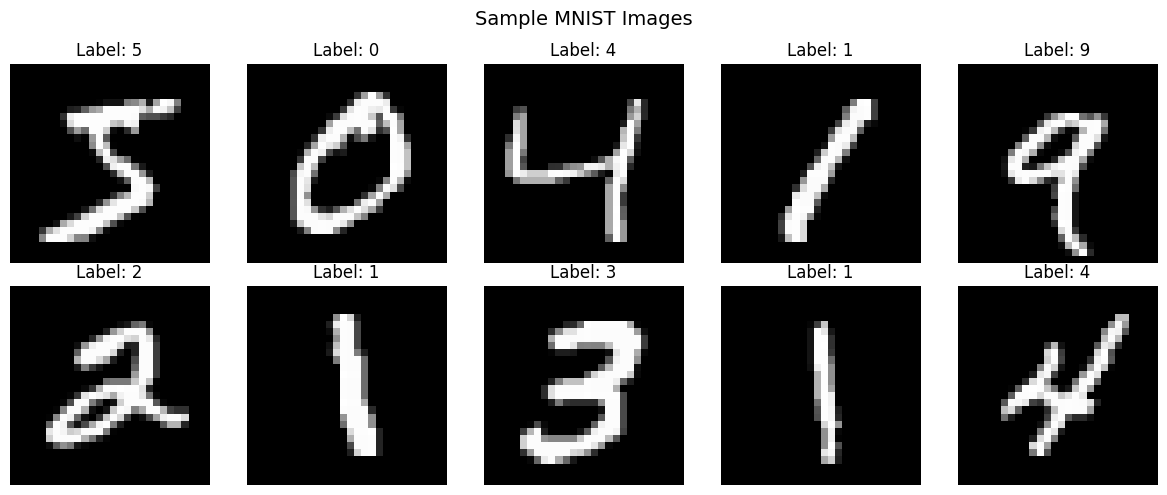

In [3]:
# Visualize sample images
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_train[i], cmap="gray")
    ax.set_title(f"Label: {y_train[i]}")
    ax.axis("off")
plt.suptitle("Sample MNIST Images", fontsize=14)
plt.tight_layout()
plt.show()

---

## Part 2: Autoencoders (AE)

An **Autoencoder** consists of:

- **Encoder**: Compresses input into a latent representation
- **Decoder**: Reconstructs input from the latent representation

The model learns to minimize reconstruction error, creating useful compressed representations.


In [4]:
# Simple Dense Autoencoder
LATENT_DIM = 32

# Encoder
encoder_input = layers.Input(shape=(784,), name="encoder_input")
x = layers.Dense(256, activation="relu")(encoder_input)
x = layers.Dense(128, activation="relu")(x)
latent = layers.Dense(LATENT_DIM, activation="relu", name="latent")(x)

encoder = Model(encoder_input, latent, name="encoder")

# Decoder
decoder_input = layers.Input(shape=(LATENT_DIM,), name="decoder_input")
x = layers.Dense(128, activation="relu")(decoder_input)
x = layers.Dense(256, activation="relu")(x)
decoder_output = layers.Dense(784, activation="sigmoid")(x)

decoder = Model(decoder_input, decoder_output, name="decoder")

# Full Autoencoder
ae_output = decoder(encoder(encoder_input))
autoencoder = Model(encoder_input, ae_output, name="autoencoder")

autoencoder.compile(optimizer="adam", loss="binary_crossentropy")
autoencoder.summary()

Model: "autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ encoder_input (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder (Functional)            │ (None, 32)             │       237,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder (Functional)            │ (None, 784)            │       238,736 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 476,720 (1.82 MB)

 Trainable params: 476,720 (1.82 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
# Train the autoencoder
history_ae = autoencoder.fit(
    X_train_flat,
    X_train_flat,
    epochs=20,
    batch_size=256,
    validation_data=(X_test_flat, X_test_flat),
    verbose=1,
)

Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - loss: 0.3104 - val_loss: 0.1480
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1410 - val_loss: 0.1234
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1217 - val_loss: 0.1135
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1126 - val_loss: 0.1068
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1069 - val_loss: 0.1030
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1033 - val_loss: 0.1006
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1008 - val_loss: 0.0986
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0989 - val_loss: 0.0971
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0975 - val_loss: 0.0959
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0962 - val_loss: 0.0948
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0952 - val_loss: 0.0939
Epoch 12/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/ste

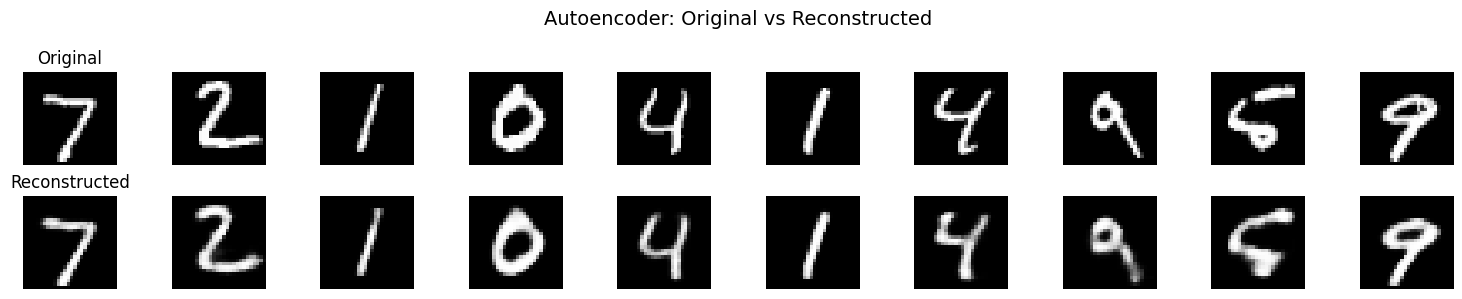

In [6]:
# Visualize reconstruction results
reconstructed = autoencoder.predict(X_test_flat[:10], verbose=0)

fig, axes = plt.subplots(2, 10, figsize=(15, 3))
for i in range(10):
    # Original
    axes[0, i].imshow(X_test[i], cmap="gray")
    axes[0, i].axis("off")
    if i == 0:
        axes[0, i].set_title("Original")
    # Reconstructed
    axes[1, i].imshow(reconstructed[i].reshape(28, 28), cmap="gray")
    axes[1, i].axis("off")
    if i == 0:
        axes[1, i].set_title("Reconstructed")
plt.suptitle("Autoencoder: Original vs Reconstructed", fontsize=14)
plt.tight_layout()
plt.show()

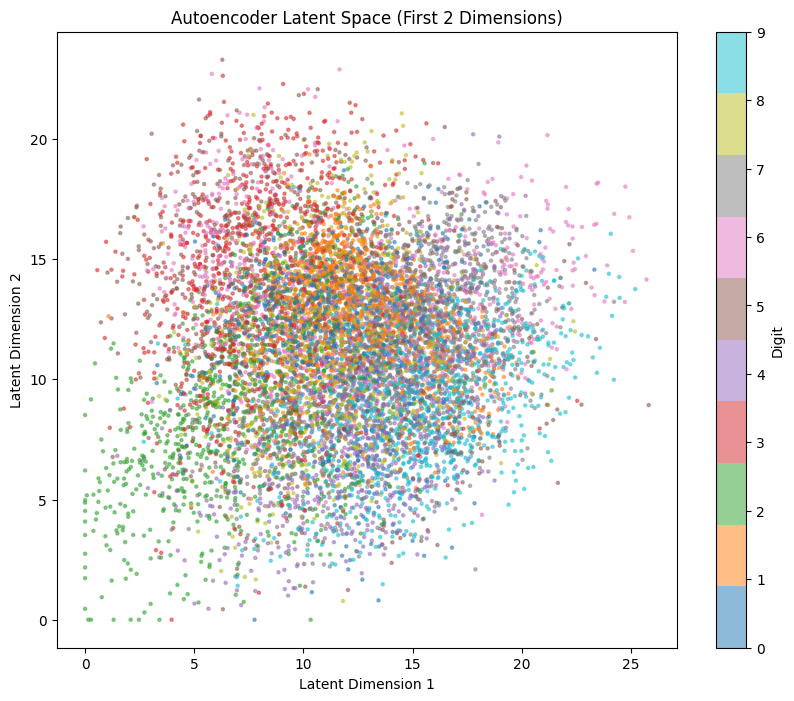

In [7]:
# Visualize latent space (using first 2 dimensions)
latent_representations = encoder.predict(X_test_flat, verbose=0)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(
    latent_representations[:, 0],
    latent_representations[:, 1],
    c=y_test,
    cmap="tab10",
    alpha=0.5,
    s=5,
)
plt.colorbar(scatter, label="Digit")
plt.xlabel("Latent Dimension 1")
plt.ylabel("Latent Dimension 2")
plt.title("Autoencoder Latent Space (First 2 Dimensions)")
plt.show()

---

## Part 3: Variational Autoencoders (VAE)

A **VAE** adds a probabilistic twist:

- Encoder outputs **mean** and **variance** of a latent distribution
- Uses **reparameterization trick** for backpropagation
- Loss = Reconstruction Loss + KL Divergence

This creates a smooth, continuous latent space ideal for generation.


In [8]:
# Sampling layer using reparameterization trick
class Sampling(layers.Layer):
    """Reparameterization trick: z = mean + std * epsilon"""

    def call(self, inputs):
        z_mean, z_log_var = inputs
        batch = tf.shape(z_mean)[0]
        dim = tf.shape(z_mean)[1]
        epsilon = tf.random.normal(shape=(batch, dim))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon

In [9]:
# VAE Architecture
VAE_LATENT_DIM = 2  # 2D for easy visualization

# Encoder
vae_encoder_input = layers.Input(shape=(784,))
x = layers.Dense(256, activation="relu")(vae_encoder_input)
x = layers.Dense(128, activation="relu")(x)
z_mean = layers.Dense(VAE_LATENT_DIM, name="z_mean")(x)
z_log_var = layers.Dense(VAE_LATENT_DIM, name="z_log_var")(x)
z = Sampling()([z_mean, z_log_var])

vae_encoder = Model(vae_encoder_input, [z_mean, z_log_var, z], name="vae_encoder")

# Decoder
vae_decoder_input = layers.Input(shape=(VAE_LATENT_DIM,))
x = layers.Dense(128, activation="relu")(vae_decoder_input)
x = layers.Dense(256, activation="relu")(x)
vae_decoder_output = layers.Dense(784, activation="sigmoid")(x)

vae_decoder = Model(vae_decoder_input, vae_decoder_output, name="vae_decoder")

print("VAE Encoder:")
vae_encoder.summary()
print("\nVAE Decoder:")
vae_decoder.summary()

VAE Encoder:


Model: "vae_encoder"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 784)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 256)       │    200,960 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_6 (Dense)     │ (None, 128)       │     32,896 │ dense_5[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ z_mean (Dense)      │ (None, 2)         │        258 │ dense_6[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ z_log_var (Dense)   │ (None, 2)         │        258 │ dense_6[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sampling (Sampling) │ (None, 2)         │          0 │ z_mean[0][0],     │
│                     │                   │            │ z_log_var[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 234,372 (915.52 KB)

 Trainable params: 234,372 (915.52 KB)

 Non-trainable params: 0 (0.00 B)


VAE Decoder:


Model: "vae_decoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 784)            │       201,488 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 234,896 (917.56 KB)

 Trainable params: 234,896 (917.56 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# Custom VAE Model with loss computation
class VAE(Model):
    def __init__(self, encoder, decoder, **kwargs):
        super().__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.reconstruction_loss_tracker = keras.metrics.Mean(
            name="reconstruction_loss"
        )
        self.kl_loss_tracker = keras.metrics.Mean(name="kl_loss")
        self.total_loss_tracker = keras.metrics.Mean(name="total_loss")

    @property
    def metrics(self):
        return [
            self.total_loss_tracker,
            self.reconstruction_loss_tracker,
            self.kl_loss_tracker,
        ]

    def train_step(self, data):
        with tf.GradientTape() as tape:
            z_mean, z_log_var, z = self.encoder(data)
            reconstruction = self.decoder(z)

            # Reconstruction loss
            reconstruction_loss = (
                tf.reduce_mean(keras.losses.binary_crossentropy(data, reconstruction))
                * 784
            )

            # KL divergence loss
            kl_loss = -0.5 * tf.reduce_mean(
                1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var)
            )

            total_loss = reconstruction_loss + kl_loss

        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))

        self.total_loss_tracker.update_state(total_loss)
        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        self.kl_loss_tracker.update_state(kl_loss)

        return {
            "loss": self.total_loss_tracker.result(),
            "reconstruction_loss": self.reconstruction_loss_tracker.result(),
            "kl_loss": self.kl_loss_tracker.result(),
        }

In [11]:
# Train VAE
vae = VAE(vae_encoder, vae_decoder)
vae.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001))

history_vae = vae.fit(X_train_flat, epochs=30, batch_size=128, verbose=1)

Epoch 1/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - kl_loss: 4.9584 - loss: 231.4727 - reconstruction_loss: 226.5143
Epoch 2/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - kl_loss: 3.0082 - loss: 165.8242 - reconstruction_loss: 162.8159
Epoch 3/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - kl_loss: 3.1098 - loss: 159.7536 - reconstruction_loss: 156.6438
Epoch 4/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - kl_loss: 3.2627 - loss: 155.4680 - reconstruction_loss: 152.2053
Epoch 5/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - kl_loss: 3.3348 - loss: 152.7038 - reconstruction_loss: 149.3690
Epoch 6/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - kl_loss: 3.3720 - loss: 150.6436 - reconstruction_loss: 147.2715
Epoch 7/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - kl_loss: 3.4367 - loss: 148.9394 - reconstruction_loss: 145.5027
Epoch 8/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - kl_loss: 3.4858 - loss: 147.3714 - reconstruction_loss: 143.8855
Epoch 9/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/s

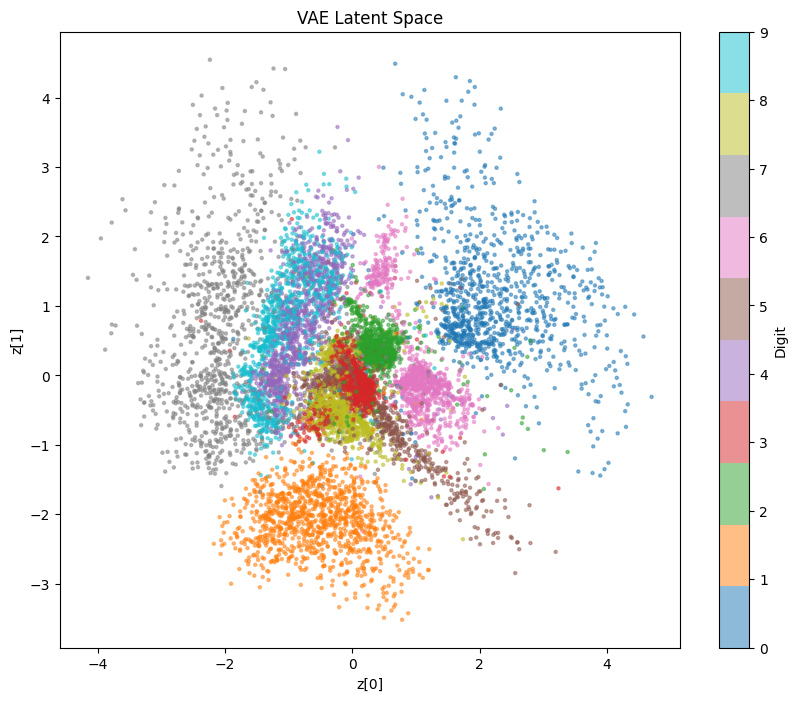

In [12]:
# Visualize VAE latent space
z_mean, z_log_var, z = vae_encoder.predict(X_test_flat, verbose=0)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(
    z_mean[:, 0], z_mean[:, 1], c=y_test, cmap="tab10", alpha=0.5, s=5
)
plt.colorbar(scatter, label="Digit")
plt.xlabel("z[0]")
plt.ylabel("z[1]")
plt.title("VAE Latent Space")
plt.show()

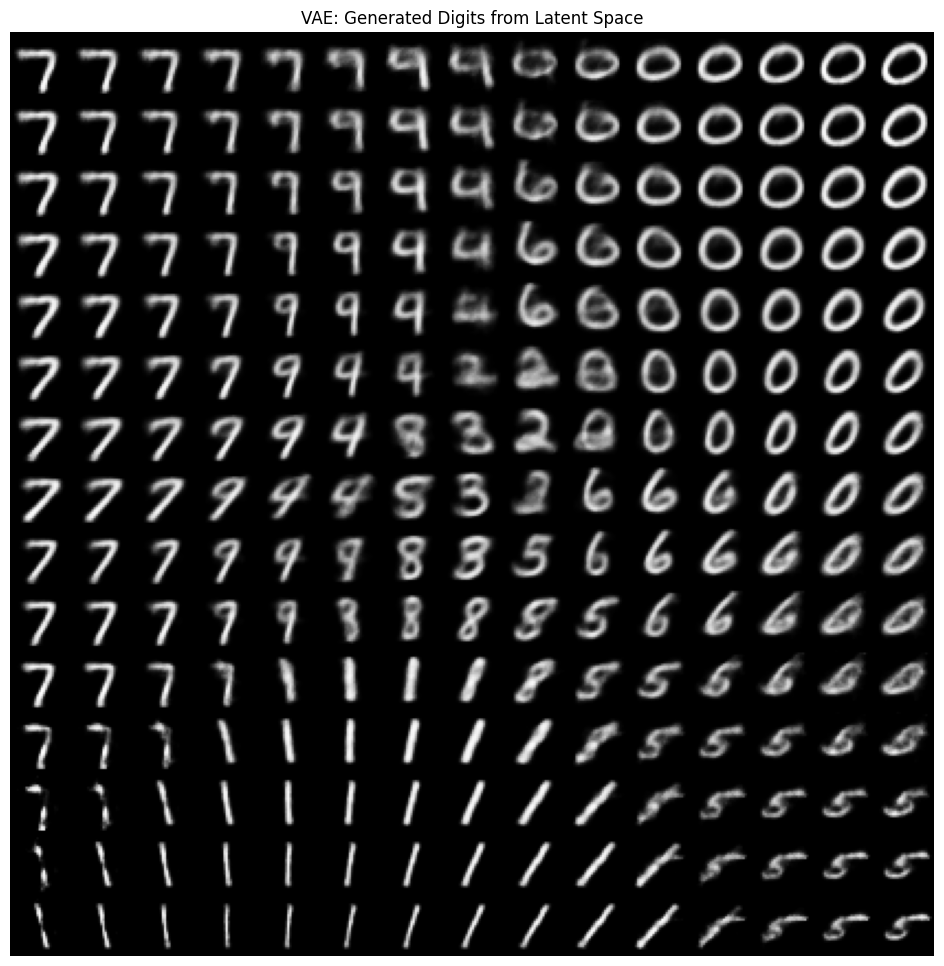

In [13]:
# Generate new digits by sampling from latent space
n = 15  # Grid size
figure = np.zeros((28 * n, 28 * n))

# Sample from standard normal distribution
grid_x = np.linspace(-3, 3, n)
grid_y = np.linspace(-3, 3, n)[::-1]

for i, yi in enumerate(grid_y):
    for j, xi in enumerate(grid_x):
        z_sample = np.array([[xi, yi]])
        x_decoded = vae_decoder.predict(z_sample, verbose=0)
        digit = x_decoded[0].reshape(28, 28)
        figure[i * 28 : (i + 1) * 28, j * 28 : (j + 1) * 28] = digit

plt.figure(figsize=(12, 12))
plt.imshow(figure, cmap="gray")
plt.title("VAE: Generated Digits from Latent Space")
plt.axis("off")
plt.show()

---

## Part 4: Generative Adversarial Networks (GAN)

A **GAN** consists of two competing networks:

- **Generator**: Creates fake samples from random noise
- **Discriminator**: Distinguishes real from fake samples

They are trained adversarially - the generator improves at fooling the discriminator.


In [14]:
# GAN Configuration
GAN_LATENT_DIM = 100


# Generator
def build_generator():
    model = keras.Sequential(
        [
            layers.Dense(256, input_dim=GAN_LATENT_DIM),
            layers.LeakyReLU(0.2),
            layers.BatchNormalization(),
            layers.Dense(512),
            layers.LeakyReLU(0.2),
            layers.BatchNormalization(),
            layers.Dense(1024),
            layers.LeakyReLU(0.2),
            layers.BatchNormalization(),
            layers.Dense(784, activation="tanh"),
            layers.Reshape((28, 28, 1)),
        ],
        name="generator",
    )
    return model


# Discriminator
def build_discriminator():
    model = keras.Sequential(
        [
            layers.Flatten(input_shape=(28, 28, 1)),
            layers.Dense(512),
            layers.LeakyReLU(0.2),
            layers.Dropout(0.3),
            layers.Dense(256),
            layers.LeakyReLU(0.2),
            layers.Dropout(0.3),
            layers.Dense(1, activation="sigmoid"),
        ],
        name="discriminator",
    )
    return model


generator = build_generator()
discriminator = build_discriminator()

print("Generator:")
generator.summary()
print("\nDiscriminator:")
discriminator.summary()

Generator:


Model: "generator"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 256)            │        25,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 1024)           │       525,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 784)            │       803,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 28, 28, 1)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,493,520 (5.70 MB)

 Trainable params: 1,489,936 (5.68 MB)

 Non-trainable params: 3,584 (14.00 KB)


Discriminator:


Model: "discriminator"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 533,505 (2.04 MB)

 Trainable params: 533,505 (2.04 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
# Custom GAN Model
class GAN(Model):
    def __init__(self, generator, discriminator, latent_dim):
        super().__init__()
        self.generator = generator
        self.discriminator = discriminator
        self.latent_dim = latent_dim
        self.g_loss_tracker = keras.metrics.Mean(name="g_loss")
        self.d_loss_tracker = keras.metrics.Mean(name="d_loss")

    def compile(self, g_optimizer, d_optimizer, loss_fn):
        super().compile()
        self.g_optimizer = g_optimizer
        self.d_optimizer = d_optimizer
        self.loss_fn = loss_fn

    @property
    def metrics(self):
        return [self.g_loss_tracker, self.d_loss_tracker]

    def train_step(self, real_images):
        batch_size = tf.shape(real_images)[0]

        # Generate random noise
        random_latent_vectors = tf.random.normal(shape=(batch_size, self.latent_dim))
        generated_images = self.generator(random_latent_vectors)

        # Combine with real images
        combined_images = tf.concat([generated_images, real_images], axis=0)
        labels = tf.concat(
            [tf.zeros((batch_size, 1)), tf.ones((batch_size, 1))], axis=0
        )

        # Add noise to labels (label smoothing)
        labels += 0.05 * tf.random.uniform(tf.shape(labels))

        # Train discriminator
        with tf.GradientTape() as tape:
            predictions = self.discriminator(combined_images)
            d_loss = self.loss_fn(labels, predictions)
        grads = tape.gradient(d_loss, self.discriminator.trainable_weights)
        self.d_optimizer.apply_gradients(
            zip(grads, self.discriminator.trainable_weights)
        )

        # Train generator
        random_latent_vectors = tf.random.normal(shape=(batch_size, self.latent_dim))
        misleading_labels = tf.ones(
            (batch_size, 1)
        )  # Want discriminator to think these are real

        with tf.GradientTape() as tape:
            predictions = self.discriminator(self.generator(random_latent_vectors))
            g_loss = self.loss_fn(misleading_labels, predictions)
        grads = tape.gradient(g_loss, self.generator.trainable_weights)
        self.g_optimizer.apply_gradients(zip(grads, self.generator.trainable_weights))

        self.g_loss_tracker.update_state(g_loss)
        self.d_loss_tracker.update_state(d_loss)

        return {
            "g_loss": self.g_loss_tracker.result(),
            "d_loss": self.d_loss_tracker.result(),
        }

In [16]:
# Callback to visualize generated images during training
class GANMonitor(keras.callbacks.Callback):
    def __init__(self, num_img=5, latent_dim=100):
        self.num_img = num_img
        self.latent_dim = latent_dim
        self.random_latent_vectors = tf.random.normal(shape=(num_img, latent_dim))

    def on_epoch_end(self, epoch, logs=None):
        if epoch % 10 == 0 or epoch == 49:  # Show every 10 epochs
            generated_images = self.model.generator(self.random_latent_vectors)
            generated_images = (generated_images + 1) / 2.0  # Rescale to [0, 1]

            fig, axes = plt.subplots(1, self.num_img, figsize=(12, 3))
            for i, ax in enumerate(axes):
                ax.imshow(generated_images[i, :, :, 0], cmap="gray")
                ax.axis("off")
            plt.suptitle(f"Generated Images at Epoch {epoch + 1}")
            plt.show()

Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - d_loss: 0.6677 - g_loss: 0.8301

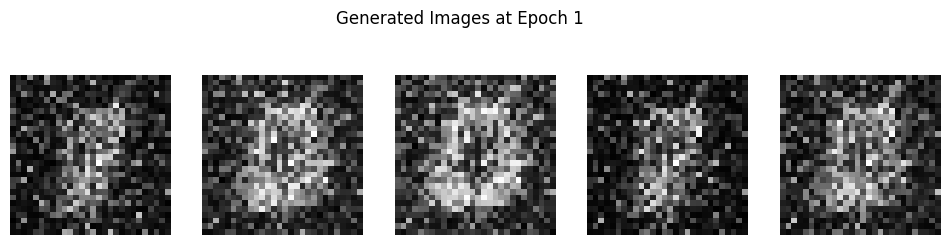

469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - d_loss: 0.6677 - g_loss: 0.8302
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - d_loss: 0.6048 - g_loss: 0.9757
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - d_loss: 0.5919 - g_loss: 1.1012
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - d_loss: 0.5518 - g_loss: 1.2203
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - d_loss: 0.5532 - g_loss: 1.2486
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - d_loss: 0.5319 - g_loss: 1.1848
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - d_loss: 0.5010 - g_loss: 1.1925
Epoch 8/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - d_loss: 0.4790 - g_loss: 1.3302
Epoch 9/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - d_loss: 0.5076 - g_loss: 1.1745
Epoch 10/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - d_loss: 0.5474 - g_loss: 1.0348
Epoch 11/50
461/469 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - d_loss: 0.5832 - g_loss: 0.9635

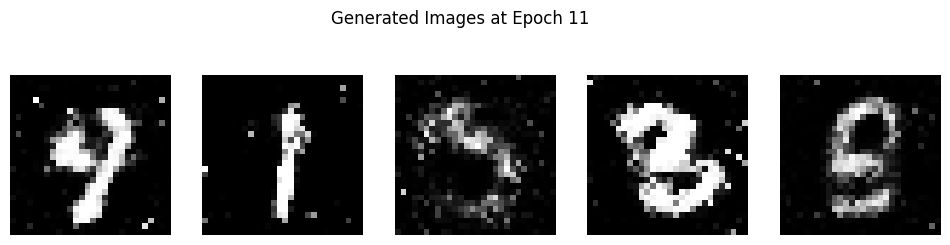

469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - d_loss: 0.5832 - g_loss: 0.9635
Epoch 12/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - d_loss: 0.5949 - g_loss: 0.9299
Epoch 13/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - d_loss: 0.6031 - g_loss: 0.8990
Epoch 14/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - d_loss: 0.6078 - g_loss: 0.8939
Epoch 15/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - d_loss: 0.6087 - g_loss: 0.8915
Epoch 16/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - d_loss: 0.6124 - g_loss: 0.9045
Epoch 17/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - d_loss: 0.6128 - g_loss: 0.9028
Epoch 18/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - d_loss: 0.6097 - g_loss: 0.9103
Epoch 25/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - d_loss: 0.6073 - g_loss: 0.9081
Epoch 26/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - d_loss: 0.6080 - g_loss: 0.9134
Epoch 27/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - d_loss: 0.6069 - g_loss: 0.8985
Epoch 28/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - 

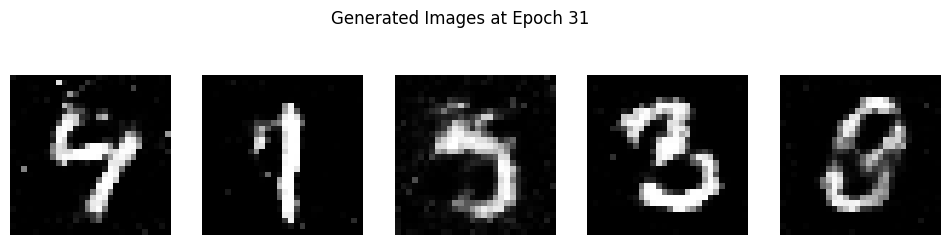

469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - d_loss: 0.6106 - g_loss: 0.9061
Epoch 32/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - d_loss: 0.6098 - g_loss: 0.9115
Epoch 33/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - d_loss: 0.6108 - g_loss: 0.9058
Epoch 34/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - d_loss: 0.6099 - g_loss: 0.9081
Epoch 35/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - d_loss: 0.6095 - g_loss: 0.9023
Epoch 36/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - d_loss: 0.6107 - g_loss: 0.9057
Epoch 37/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - d_loss: 0.6094 - g_loss: 0.9115
Epoch 38/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - d_loss: 0.6091 - g_loss: 0.9052
Epoch 39/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - d_loss: 0.6097 - g_loss: 0.9081
Epoch 40/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - d_loss: 0.6064 - g_loss: 0.9140
Epoch 41/50
460/469 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - d_loss: 0.6064 - g_loss: 0.9048

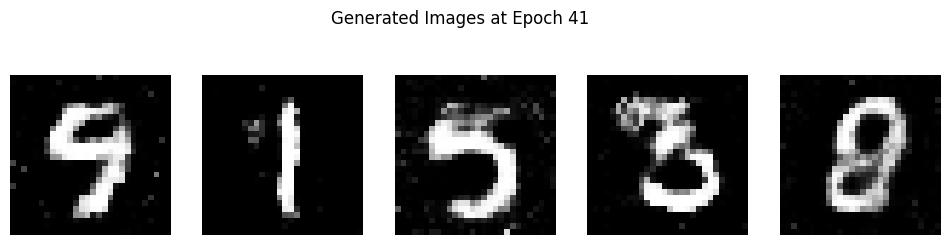

469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - d_loss: 0.6064 - g_loss: 0.9049
Epoch 42/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - d_loss: 0.6094 - g_loss: 0.9098
Epoch 43/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - d_loss: 0.6077 - g_loss: 0.9124
Epoch 44/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - d_loss: 0.6085 - g_loss: 0.9188
Epoch 45/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - d_loss: 0.6086 - g_loss: 0.9127
Epoch 46/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - d_loss: 0.6043 - g_loss: 0.9146
Epoch 47/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - d_loss: 0.6088 - g_loss: 0.9254
Epoch 48/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - d_loss: 0.6060 - g_loss: 0.9224
Epoch 49/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - d_loss: 0.6050 - g_loss: 0.9191
Epoch 50/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - d_loss: 0.6054 - g_loss: 0.9200

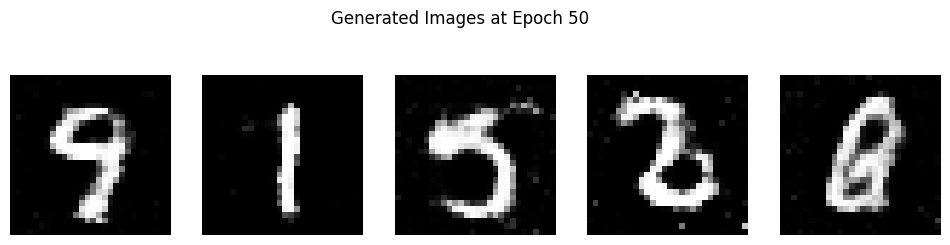

469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - d_loss: 0.6054 - g_loss: 0.9200


In [17]:
# Prepare data for GAN (scale to [-1, 1] for tanh output)
X_train_gan = (X_train_cnn.astype("float32") * 2) - 1

# Build and train GAN
gan = GAN(generator, discriminator, GAN_LATENT_DIM)
gan.compile(
    g_optimizer=keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5),
    d_optimizer=keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5),
    loss_fn=keras.losses.BinaryCrossentropy(),
)

# Train for 50 epochs
history_gan = gan.fit(
    X_train_gan,
    epochs=50,
    batch_size=128,
    callbacks=[GANMonitor(num_img=5, latent_dim=GAN_LATENT_DIM)],
    verbose=1,
)

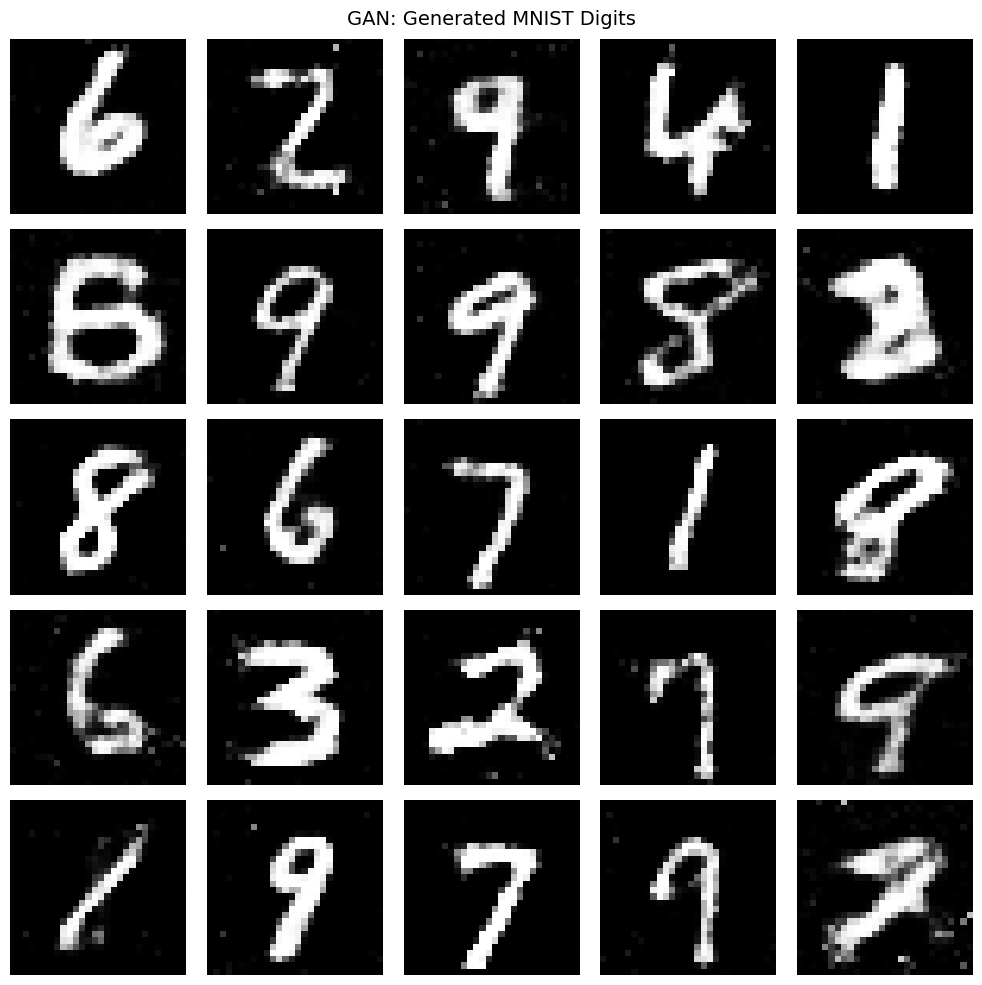

In [18]:
# Generate final batch of images
num_images = 25
random_latent_vectors = tf.random.normal(shape=(num_images, GAN_LATENT_DIM))
generated_images = generator(random_latent_vectors)
generated_images = (generated_images + 1) / 2.0  # Rescale to [0, 1]

fig, axes = plt.subplots(5, 5, figsize=(10, 10))
for i, ax in enumerate(axes.flat):
    ax.imshow(generated_images[i, :, :, 0], cmap="gray")
    ax.axis("off")
plt.suptitle("GAN: Generated MNIST Digits", fontsize=14)
plt.tight_layout()
plt.show()

---

## Part 5: Model Comparison and Summary

| Model           | Type          | Key Feature                  | Use Case                               |
| --------------- | ------------- | ---------------------------- | -------------------------------------- |
| **Autoencoder** | Deterministic | Compression & reconstruction | Dimensionality reduction, denoising    |
| **VAE**         | Probabilistic | Smooth latent space          | Controllable generation, interpolation |
| **GAN**         | Adversarial   | High-quality samples         | Realistic image generation             |


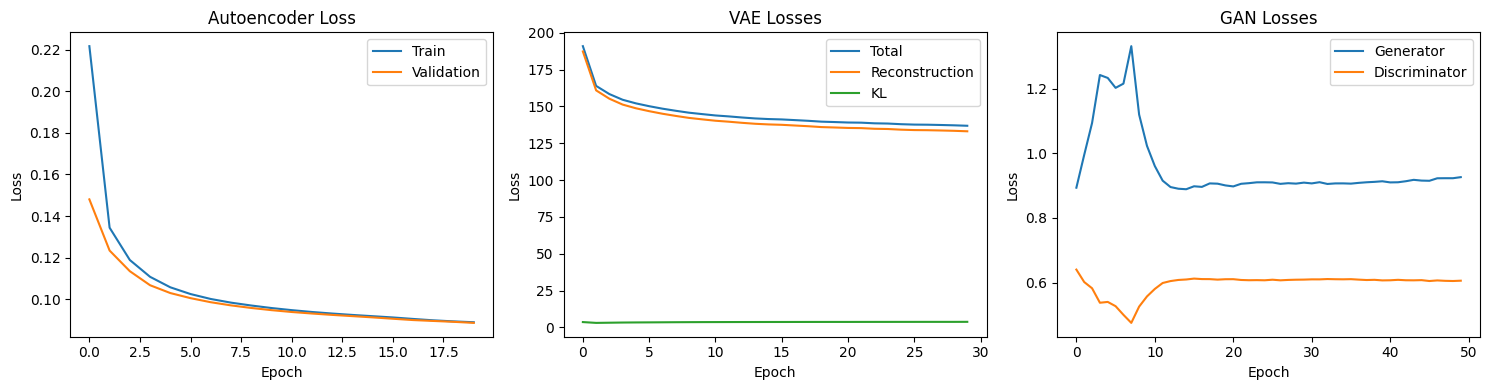

In [19]:
# Plot training curves
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Autoencoder loss
axes[0].plot(history_ae.history["loss"], label="Train")
axes[0].plot(history_ae.history["val_loss"], label="Validation")
axes[0].set_title("Autoencoder Loss")
axes[0].set_xlabel("Epoch")
axes[0].set_ylabel("Loss")
axes[0].legend()

# VAE losses
axes[1].plot(history_vae.history["loss"], label="Total")
axes[1].plot(history_vae.history["reconstruction_loss"], label="Reconstruction")
axes[1].plot(history_vae.history["kl_loss"], label="KL")
axes[1].set_title("VAE Losses")
axes[1].set_xlabel("Epoch")
axes[1].set_ylabel("Loss")
axes[1].legend()

# GAN losses
axes[2].plot(history_gan.history["g_loss"], label="Generator")
axes[2].plot(history_gan.history["d_loss"], label="Discriminator")
axes[2].set_title("GAN Losses")
axes[2].set_xlabel("Epoch")
axes[2].set_ylabel("Loss")
axes[2].legend()

plt.tight_layout()
plt.show()

---

## Conclusion

In this notebook, we explored three fundamental generative models:

1. **Autoencoders** - Learn compressed representations through reconstruction
2. **Variational Autoencoders** - Add probabilistic structure for smooth generation
3. **Generative Adversarial Networks** - Use adversarial training for high-quality samples

### Key Takeaways:

- AEs are great for dimensionality reduction but may have discontinuous latent spaces
- VAEs provide smooth, interpretable latent spaces but can produce blurry outputs
- GANs generate sharp images but are harder to train and evaluate

### Further Exploration:

- **Conditional VAE/GAN** - Control what to generate
- **DCGAN** - CNN-based GAN for better image quality
- **StyleGAN** - State-of-the-art face generation
- **Diffusion Models** - Latest advancement in generative AI
